# Lab 4-1. PyTorch Tutorial

### 이번 실습은 PyTorch tutorial로 gpu 연산이 가능한 torch tensor와 다양한 딥러닝 학습 관련 기능들을 내장한 torch package에 대해 알아봅니다.

### 또한 PyTorch에서 유용하게 사용될 수 있는 다양한 이미지 데이터 관련 기능들을 제공하는 torchvision package를 이용해 다양한 dataset을 불러오고 작동하는 방식에 대해 알아보겠습니다.

### PyTorch는 TensorFlow와 함께 가장 많이 사용되는 딥러닝 학습 패키지로 TensorFlow보다 늦게 등장했지만 사용 방법이 더 직관적이기 때문에 최근에는 더 많이 사용되고 있습니다.

### PyTorch의 tensor datatype은 Numpy의 행렬 연산과 유용한 기능들을 지원하며 PyTorch 내부적으로 모델 학습과 관련된 다양한 알고리즘들이 구현되어 있습니다.

### torchvision 등 학습과 실습에 유용한 패키지들이 추가적으로 개발되어 있기 때문에 AI 엔지니어로서 딥러닝 모델을 개발하는 데에 필수적인 툴입니다.

### 이번 실습에서 사용할 패키지들은 다음과 같습니다.

- numpy
- pytorch
- torchvision
- matplotlib

### Package import

In [ ]:
import numpy as np

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

## 4-1-1. Torch tensor란?

### Torch의 tensor는 numpy의 ndarray와 마찬가지로 다차원 데이터 배열입니다.

### 때문에 tensor를 생성할 때는 list의 형태로 데이터를 넘겨주기도 하지만 보통은 numpy ndarray를 넘겨줍니다.

### 또한 이름은 약간씩 다를 수 있지만 numpy의 유용한 연산과 기법들을 대부분 사용이 가능하여 큰 혼동없이 다룰 수 있습니다.

### Torch tensor가 numpy ndarray와 다른 점은 모델 학습에 필요한 back propagation을 다루기 위해 이를 위한 정보들을 내부에 추가적으로 저장한다는 것입니다.

### 5주차 강의 때 배우시겠지만 back propagation (backward pass)를 위해서는 forward pass에서 전달된 값과 연산의 종류를 기억하고 있어야 하는데 torch tensor는 require_grads flag를 이용해 이러한 정보를 기억할지 설정할 수 있습니다.

### 이번 실습에서는 numpy의 유사한 tensor 연산을 복습해보고 torch 고유의 dataset, dataloader, 그리고 nn.module 등에 대해 살펴보겠습니다.

### 생성

In [ ]:
# torch.tensor(data, device)
a = torch.tensor([[1.0, 4.0], [4.0, 3.0]], device=0)
b = torch.tensor([[4, 3], [1, 4], [1, 2]], dtype=torch.float32, device="cpu")
print(a)
print(b)

tensor([[1., 4.],
        [4., 3.]], device='cuda:0')
tensor([[4., 3.],
        [1., 4.],
        [1., 2.]])


In [ ]:
print(a.dtype, a.device, a.shape)
print(b.dtype, b.device, b.shape)

torch.float32 cuda:0 torch.Size([2, 2])
torch.float32 cpu torch.Size([3, 2])


In [ ]:
a = torch.Tensor([[4, 2], [2, 1]])
print(a)
print(a.dtype, a.device)

tensor([[4., 2.],
        [2., 1.]])
torch.float32 cpu


In [ ]:
a = torch.ones([2, 3])
b = torch.zeros([3, 2], dtype=torch.int64)
c = torch.eye(4)
d = torch.rand([2, 4, 3], dtype=torch.float)

print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0, 0],
        [0, 0],
        [0, 0]])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
tensor([[[0.0817, 0.1124, 0.3062],
         [0.8459, 0.1507, 0.4837],
         [0.2264, 0.7244, 0.7558],
         [0.8155, 0.4781, 0.5324]],

        [[0.2561, 0.0113, 0.1974],
         [0.2935, 0.4444, 0.6761],
         [0.8851, 0.7290, 0.9931],
         [0.1203, 0.4335, 0.7263]]])


In [ ]:
# generation from numpy ndarray
d = np.array([[2, 5, 4], [4, 2, 1], [5, 7, 4]])

a = torch.tensor(d)
# b = torch.from_numpy(d)
b = torch.as_tensor(d)

print(a)
print(b)
print(d)

d[0, 0] = 100

print(a)
print(b)
print(d)

tensor([[2, 5, 4],
        [4, 2, 1],
        [5, 7, 4]])
tensor([[2, 5, 4],
        [4, 2, 1],
        [5, 7, 4]])
[[2 5 4]
 [4 2 1]
 [5 7 4]]
tensor([[2, 5, 4],
        [4, 2, 1],
        [5, 7, 4]])
tensor([[100,   5,   4],
        [  4,   2,   1],
        [  5,   7,   4]])
[[100   5   4]
 [  4   2   1]
 [  5   7   4]]


In [ ]:
# -like creation
print(a)
print(a.dtype)
# a의 형식으로 만들어라!
b = torch.ones_like(a)
c = torch.zeros_like(a, dtype=torch.float)
d = torch.rand_like(a, dtype=torch.float)

print(b)
print(c)
print(d)

tensor([[2, 5, 4],
        [4, 2, 1],
        [5, 7, 4]])
torch.int64
tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.7127, 0.3028, 0.3755],
        [0.3264, 0.7859, 0.6228],
        [0.3982, 0.1060, 0.8309]])


### gpu 사용

In [ ]:
torch.cuda.is_available()

True

In [ ]:
# gpu tensor로 만들기
if torch.cuda.is_available():
  a = torch.tensor([[4,3,2],[1,2,3]])
  print(a)
  # 쿠다로 옮기는데 시간이 걸림
  b = a.to("cuda")
  print(b)

tensor([[4, 3, 2],
        [1, 2, 3]])
tensor([[4, 3, 2],
        [1, 2, 3]], device='cuda:0')


In [ ]:
b[0][0] = 100
print(a)
print(b)

tensor([[4, 3, 2],
        [1, 2, 3]])
tensor([[100,   3,   2],
        [  1,   2,   3]], device='cuda:0')


### concat, stack, squeeze, unsqueeze

In [ ]:
a = torch.rand([2, 3])
b = torch.rand([2, 3])
print(a)
print(b)

tensor([[0.4342, 0.6489, 0.1538],
        [0.1106, 0.5670, 0.2118]])
tensor([[0.4050, 0.9898, 0.7434],
        [0.7247, 0.7229, 0.5607]])


In [ ]:
print(a.shape)
print(b.shape)

torch.Size([2, 3])
torch.Size([2, 3])


In [ ]:
# concat
c = torch.cat([a, b], dim=0)
d = torch.cat([a, b], dim=1)
print(c)
print(c.shape)
print(d)
print(d.shape)

tensor([[0.4342, 0.6489, 0.1538],
        [0.1106, 0.5670, 0.2118],
        [0.4050, 0.9898, 0.7434],
        [0.7247, 0.7229, 0.5607]])
torch.Size([4, 3])
tensor([[0.4342, 0.6489, 0.1538, 0.4050, 0.9898, 0.7434],
        [0.1106, 0.5670, 0.2118, 0.7247, 0.7229, 0.5607]])
torch.Size([2, 6])


In [ ]:
# stack
c = torch.stack([a, b], dim=0)
d = torch.stack([a, b], dim=1)
e = torch.stack([a, b], dim=2)
print(c)
print(c.shape)
print(d)
print(d.shape)
print(e)
print(e.shape)

tensor([[[0.4342, 0.6489, 0.1538],
         [0.1106, 0.5670, 0.2118]],

        [[0.4050, 0.9898, 0.7434],
         [0.7247, 0.7229, 0.5607]]])
torch.Size([2, 2, 3])
tensor([[[0.4342, 0.6489, 0.1538],
         [0.4050, 0.9898, 0.7434]],

        [[0.1106, 0.5670, 0.2118],
         [0.7247, 0.7229, 0.5607]]])
torch.Size([2, 2, 3])
tensor([[[0.4342, 0.4050],
         [0.6489, 0.9898],
         [0.1538, 0.7434]],

        [[0.1106, 0.7247],
         [0.5670, 0.7229],
         [0.2118, 0.5607]]])
torch.Size([2, 3, 2])


In [ ]:
# hstack and vstack
c = torch.hstack([a, b])
print(c)
print(c.shape)
d = torch.vstack([a, b])
print(d)
print(d.shape)

tensor([[0.5362, 0.3633, 0.3954, 0.9718, 0.8593, 0.3625],
        [0.6720, 0.5300, 0.4294, 0.2052, 0.9983, 0.5959]])
torch.Size([2, 6])
tensor([[0.5362, 0.3633, 0.3954],
        [0.6720, 0.5300, 0.4294],
        [0.9718, 0.8593, 0.3625],
        [0.2052, 0.9983, 0.5959]])
torch.Size([4, 3])


In [ ]:
# unsqueeze and squeeze
print(a)
a = torch.unsqueeze(a, dim=1)
print(a)
print(a.shape)

print(torch.squeeze(a))
print(a.shape)

tensor([[0.5362, 0.3633, 0.3954],
        [0.6720, 0.5300, 0.4294]])
tensor([[[0.5362, 0.3633, 0.3954]],

        [[0.6720, 0.5300, 0.4294]]])
torch.Size([2, 1, 3])
tensor([[0.5362, 0.3633, 0.3954],
        [0.6720, 0.5300, 0.4294]])
torch.Size([2, 1, 3])



### Arithmetic operations

In [ ]:
# matrix multiplication
a = torch.tensor(np.array(list(range(12)))).reshape(3, 4)
print(a)
b = torch.tensor(np.array(list(range(8)))).reshape(4, 2)
print(b)

c = a @ b
print(c)

d = torch.matmul(a, b)
print(d)

torch.matmul(a, b, out=e)
print(e)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]])
tensor([[ 28,  34],
        [ 76,  98],
        [124, 162]])
tensor([[ 28,  34],
        [ 76,  98],
        [124, 162]])


RuntimeError: ignored

In [ ]:
# element-wise product
a = torch.tensor(np.array(list(range(6)))).reshape(2, 3)
print(a)
b = torch.tensor(list(range(10, 13))).reshape(1, 3)
print(b)

c = a * b
print(c)

d = a.mul(b)
print(d)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[10, 11, 12]])
tensor([[ 0, 11, 24],
        [30, 44, 60]])
tensor([[ 0, 11, 24],
        [30, 44, 60]])


In [ ]:
# item
agg = d.sum()
v = agg.item()
print(v, type(v))

169 <class 'int'>


In [ ]:
# inplace operations
print(a)
a.add_(5)
print(a)
a.add_(b)
print(a)

tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[ 5,  6,  7],
        [ 8,  9, 10]])
tensor([[15, 17, 19],
        [18, 20, 22]])


### tensor to numpy array

In [ ]:
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [ ]:
a.add_(5)
print(a)
print(b)

tensor([6., 6., 6., 6., 6.])
[6. 6. 6. 6. 6.]


## 4-1-2. Datasets and dataloaders

### pytorch를 이용한 모델의 학습 과정은 보통 다음과 같은 과정을 거칩니다.

### 1. Data 처리 및 준비

### 2. 모델 생성

### 3. 모델 학습

### 4. 모델 평가

### 2-4의 과정을 거치기 전에 데이터를 잘 준비해서 batch 단위로 받기만 하는 것이 깔끔하기 때문에 pytorch는 1번과 2-4번 과정을 분리하기 위해 datasets과 dataloader라는 class를 사용합니다.

### 물론 pytorch 모델를 사용하는 데에 이러한 구조가 필수적인 것은 아니기에 utils에 따로 분리되어 있지만 대부분의 경우에 사용한다고 생각해도 좋습니다.

### dataset은 전체 데이터를 sample 단위로 처리해서 주는 역할을 하며 dataloader는 이를 batch 단위로 묶어주는 역할을 합니다.

### 처음 접하는 분들은 낯선 개념에 어려우실수도 있지만 익숙해지면 굉장히 편리하고 코드를 깔끔하게 만들어 줍니다.

### 또한 torchvision에서 다양한 종류의 데이터를 dataset의 형태로 제공하기 때문에 이를 위해서라도 사용해 보도록 하겠습니다.

### Dataset

In [ ]:
# Custom dataset

class LionDataset(Dataset):
  def __init__(self, data, target, transform=None, target_transform=None):
    self.data = data
    self.target = target
    self.transform = transform
    self.target_transform = target_transform
    pass

# 데이터의 크기(이것이 다 돌면 epoch 하나)
  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    x = self.data[idx]
    y = self.target[idx]

    if self.transform:
      x = self.transform(x)
    if self.target_transform:
      y = self.target_transform(y)

    return x, y

In [ ]:
# 2차원 데이터 50개
data = np.array(list(range(100)), dtype=np.float).reshape(-1, 2)
# 0~9까지가 5개씩
target = np.array([[i] * 5 for i in range(10)]).reshape(-1)

print(data)
print(target)

[[ 0.  1.]
 [ 2.  3.]
 [ 4.  5.]
 [ 6.  7.]
 [ 8.  9.]
 [10. 11.]
 [12. 13.]
 [14. 15.]
 [16. 17.]
 [18. 19.]
 [20. 21.]
 [22. 23.]
 [24. 25.]
 [26. 27.]
 [28. 29.]
 [30. 31.]
 [32. 33.]
 [34. 35.]
 [36. 37.]
 [38. 39.]
 [40. 41.]
 [42. 43.]
 [44. 45.]
 [46. 47.]
 [48. 49.]
 [50. 51.]
 [52. 53.]
 [54. 55.]
 [56. 57.]
 [58. 59.]
 [60. 61.]
 [62. 63.]
 [64. 65.]
 [66. 67.]
 [68. 69.]
 [70. 71.]
 [72. 73.]
 [74. 75.]
 [76. 77.]
 [78. 79.]
 [80. 81.]
 [82. 83.]
 [84. 85.]
 [86. 87.]
 [88. 89.]
 [90. 91.]
 [92. 93.]
 [94. 95.]
 [96. 97.]
 [98. 99.]]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 9 9 9 9 9]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
lion = LionDataset(data=data, target=target)

print(lion[12])
print(lion[27])

(array([24., 25.]), 2)
(array([54., 55.]), 5)


### DataLoader

In [ ]:
loader = DataLoader(dataset=lion, batch_size=10, shuffle=True)

for i, batch in enumerate(loader):
  x, y = batch
  if i == 0:
    print(x)
    print(y)
  print(x.shape)

tensor([[98., 99.],
        [84., 85.],
        [70., 71.],
        [ 6.,  7.],
        [62., 63.],
        [ 4.,  5.],
        [28., 29.],
        [40., 41.],
        [ 2.,  3.],
        [20., 21.]], dtype=torch.float64)
tensor([9, 8, 7, 0, 6, 0, 2, 4, 0, 2])
torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])
torch.Size([10, 2])


### torchvision datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
root = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "data")
ds = datasets.FashionMNIST(root=root, train=True, download=True, transform=transforms.ToTensor())

ds[0]

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /content/drive/MyDrive/Colab Notebooks/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/drive/MyDrive/Colab Notebooks/data/FashionMNIST/raw



(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

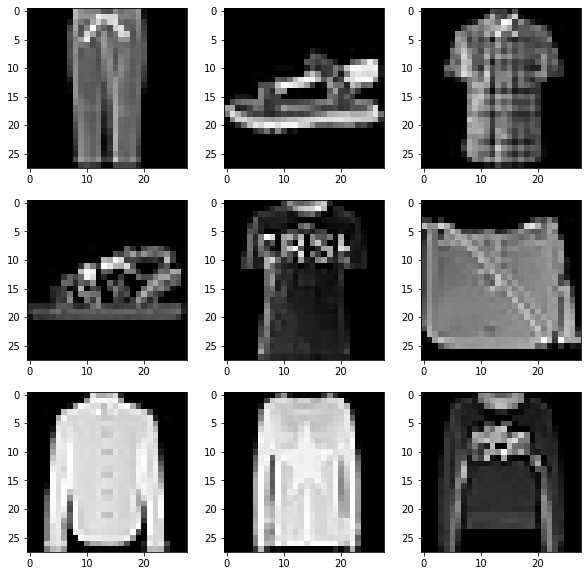

In [ ]:
loader = DataLoader(dataset=ds, batch_size=256, shuffle=True)
batch = next(iter(loader))

fig = plt.figure(figsize=(10, 10))
for i in range(9):
  x = batch[0][i]
  ax = fig.add_subplot(3, 3, i+1)
  ax.imshow(x.squeeze(), cmap="gray")
fig.show()

## 4-1-3. torch.nn.Module

### pytorch 모델은 parameters를 추적하며 forward pass를 진행한 뒤 back propagation을 통해 학습을 진행해야 합니다.

### 그렇지만 deep learning 모델은 굉장히 여러 층의 layer를 포함하기 때문에 이들을 각각 다루는 건 굉장히 복잡하고 지저분한 작업이 됩니다.

### torch.nn의 Module class는 이러한 작업을 대신 진행해 줍니다.

### 전체 모델과 그 내부의 block, 각 block 내부의 layer들이 Module을 subclass 하게 되면 parameters를 추적해주고 유용한 기능들을 한 번에 수행해 줍니다.

### 그럼 Module class가 모델 관리를 얼마나 쉽게 만들어 주는지 확인해 보겠습니다.

In [ ]:
# device 설정
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


### Define model

In [ ]:
class LionLinear(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    
    self.input_dim = input_dim
    self.output_dim = output_dim

    self.flatten = nn.Flatten()
    self.classifier = nn.Linear(input_dim, output_dim)
    self.act = nn.ReLU()

  def forward(self, x):
    # 이미지 flatten(mlp에 넣기 위해서!)
    x = self.flatten(x)
    # 리니어 모델에 넣기
    x = self.classifier(x)
    # 활성화!
    x = self.act(x)
    return x
    

In [ ]:
linear_model = LionLinear(28*28, 10).to(device)
# dim을 1부터!
print(linear_model)

LionLinear(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=784, out_features=10, bias=True)
  (act): ReLU()
)


In [ ]:
print(linear_model.classifier)

Linear(in_features=784, out_features=10, bias=True)


In [ ]:
X = torch.rand(5, 28, 28).to(device)
print(X.shape)
y = linear_model(X)
print(y.shape)
# 활성화 함수
prob = nn.Softmax(dim=1)(y)
print(prob)
# 몇번째 인덱스 가 최대값?
y_hat = prob.argmax(1)
print(y_hat)

torch.Size([5, 28, 28])
torch.Size([5, 10])
tensor([[0.0961, 0.0929, 0.1324, 0.0929, 0.1209, 0.0929, 0.0929, 0.0929, 0.0929,
         0.0929],
        [0.1177, 0.0916, 0.1155, 0.0979, 0.1183, 0.0916, 0.0916, 0.0916, 0.0916,
         0.0925],
        [0.1026, 0.0835, 0.1092, 0.0896, 0.1466, 0.0835, 0.0835, 0.1012, 0.0835,
         0.1170],
        [0.0833, 0.0833, 0.1020, 0.0833, 0.1159, 0.0833, 0.0833, 0.1244, 0.0833,
         0.1578],
        [0.1236, 0.0816, 0.1491, 0.0816, 0.1300, 0.0816, 0.0816, 0.0896, 0.0816,
         0.0996]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
tensor([2, 4, 4, 9, 2], device='cuda:0')


In [ ]:
class LionFlatten(nn.Module):
  def __init__(self):
    super().__init__()
    pass

  def forward(self, x):
    return x.reshape(x.shape[0], -1)

In [ ]:
print(X.shape)
fla = LionFlatten()
print(fla(X).shape)

torch.Size([5, 28, 28])
torch.Size([5, 784])


In [ ]:
class LionLayer(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    
    self.input_dim = input_dim
    self.output_dim = output_dim

    self.layer = nn.Linear(self.input_dim, self.output_dim)
    pass

  def forward(self, x):
    assert x.shape[-1] == self.input_dim, "Input dimension mismatch"
    return self.layer(x)

In [ ]:
lin = LionLayer(28 * 28, 20).to(device)
print(lin)
print(lin(fla(X)).shape)

LionLayer(
  (layer): Linear(in_features=784, out_features=20, bias=True)
)
torch.Size([5, 20])


In [ ]:
class LionMLP(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()

    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim

    self.flatten = LionFlatten()
    self.linear_1 = LionLayer(self.input_dim, self.hidden_dim)
    self.linear_2 = LionLayer(self.hidden_dim, self.output_dim)
    self.act_1 = nn.ReLU()
    self.act_2 = nn.Softmax()
    pass

  def forward(self, x):
    x = self.flatten(x)
    x = self.act_1(self.linear_1(x))
    x = self.act_2(self.linear_2(x))
    return x


In [ ]:
mlp = LionMLP(28*28, 50, 10)
print(mlp)

LionMLP(
  (flatten): LionFlatten()
  (linear_1): LionLayer(
    (layer): Linear(in_features=784, out_features=50, bias=True)
  )
  (linear_2): LionLayer(
    (layer): Linear(in_features=50, out_features=10, bias=True)
  )
  (act_1): ReLU()
  (act_2): Softmax(dim=None)
)


In [ ]:
class LionMLP(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim):
    super().__init__()

    self.input_dim = input_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim

    self.flatten = LionFlatten()
    self.linear_1 = LionLayer(self.input_dim, self.hidden_dim)
    self.linear_2 = LionLayer(self.hidden_dim, self.output_dim)
    self.act_1 = nn.ReLU()
    self.act_2 = nn.Softmax()

    # Sequential을 통해서 flatten>l1>act1>l2>act2 순서로 진행됨!
    self.model = nn.Sequential(self.flatten, self.linear_1, self.act_1, self.linear_2, self.act_2)
    pass

  def forward(self, x):
    return self.model(x)

In [ ]:
mlp = LionMLP(28 * 28, 40, 10)
print(mlp)

LionMLP(
  (flatten): LionFlatten()
  (linear_1): LionLayer(
    (layer): Linear(in_features=784, out_features=40, bias=True)
  )
  (linear_2): LionLayer(
    (layer): Linear(in_features=40, out_features=10, bias=True)
  )
  (act_1): ReLU()
  (act_2): Softmax(dim=None)
  (model): Sequential(
    (0): LionFlatten()
    (1): LionLayer(
      (layer): Linear(in_features=784, out_features=40, bias=True)
    )
    (2): ReLU()
    (3): LionLayer(
      (layer): Linear(in_features=40, out_features=10, bias=True)
    )
    (4): Softmax(dim=None)
  )
)


### Checking parameters

In [ ]:
for name, param in mlp.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Layer: linear_1.layer.weight | Size: torch.Size([40, 784]) | Values: tensor([[-0.0059, -0.0085,  0.0295,  ..., -0.0231, -0.0060,  0.0054],
        [-0.0105,  0.0101,  0.0347,  ...,  0.0162,  0.0008, -0.0236]],
       grad_fn=<SliceBackward0>) 

Layer: linear_1.layer.bias | Size: torch.Size([40]) | Values: tensor([-0.0227, -0.0153], grad_fn=<SliceBackward0>) 

Layer: linear_2.layer.weight | Size: torch.Size([10, 40]) | Values: tensor([[-0.1045, -0.0790, -0.0278,  0.1521,  0.0654,  0.1150, -0.0377, -0.0681,
          0.0005,  0.1061,  0.0385, -0.0950,  0.0968,  0.0240, -0.0887, -0.1048,
         -0.0978, -0.1171,  0.0964,  0.0755, -0.1020, -0.0407,  0.1435, -0.1100,
          0.0628, -0.0351,  0.1115, -0.0736, -0.0957, -0.0839, -0.0913,  0.1126,
          0.1540, -0.1290,  0.0184,  0.0196,  0.1426, -0.0190,  0.0083, -0.1320],
        [-0.0411,  0.1405, -0.1418,  0.1252,  0.0647, -0.0480, -0.0266, -0.1433,
         -0.0892,  0.0434,  0.1455,  0.0257,  0.0135, -0.1141,  0.1424, -0.0227,
  